In [149]:
import json 
data = []
# with open(f'watches_flipkart_comments.json','r') as file :
#     unpack_data = json.load(file)
#     for i in unpack_data:
#         if i:
#             for comment in i :
#                 if comment:
#                     data.append(comment)
                    
for index in range(0,17):
    if index != 12 :
        with open(f'watches_flipkart_comments{index}.json','r') as file :
            unpack_data = json.load(file)
            for i in unpack_data:
                if i:
                    for comment in i :
                        if comment:
                            data.append(comment)


In [150]:

import pandas as pd 
columns=['customer_rating','customer_review','customer_place','customer_name_date']
data = pd.DataFrame(
    data=data, columns=['customer_rating','customer_review','customer_place','customer_name_date']
)

data.shape

(144562, 4)

In [151]:
# clean customer ratings 
[ (rating, x/data.shape[0] *100) for rating, x in data.customer_rating.apply(lambda x : float(x.strip())).value_counts().to_dict().items()]

[(5.0, 69.2886097314647), (4.0, 23.189358199250147), (3.0, 7.52203206928515)]

In [152]:
data.to_csv('watch_reviews.csv', index=False, index_label=False)

In [153]:
data = pd.read_csv('watch_reviews.csv')
data.columns

Index(['customer_rating', 'customer_review', 'customer_place',
       'customer_name_date'],
      dtype='object')

In [154]:
# Cleaning customer ratings 
data.customer_rating = data.customer_rating.apply(lambda x : float(x))

In [155]:
data.customer_place = data.customer_place.apply( lambda x : place[1].strip() if len(place := x.split(',')) ==2  else None)

In [156]:
data['customer_name'] = data.customer_name_date.apply(lambda x : [x.strip()  for x in x.replace('\n','').split('  ') if x][0])
data['customer_order_date']=data.customer_name_date.apply(lambda x : [x.strip()  for x in x.replace('\n','').split('    ') if x][1])

In [157]:
data.drop(columns=['customer_name_date'], inplace=True)

In [158]:
import neattext as nt 
data.customer_review = data.customer_review.apply( lambda x : nt.remove_multiple_spaces(x))

In [159]:
data.to_csv('watch_reviews.csv', index=False, index_label=False)

In [160]:
data.head()

,customer_rating,customer_review,customer_place,customer_name,customer_order_date
0,5.0,Good one ✌️💖,Fazi Nagar,Abrar alam Alam,"Sep, 2022"
1,4.0,This is an amazing watch.but the quality of b...,Patna,Flipkart Customer,"Sep, 2022"
2,5.0,Awesome 👍👍👍👍👍,Deoria,Imamudin Ansari,"Jul, 2022"
3,5.0,Good condition,Jangipur,Ali kurban,"Apr, 2022"
4,4.0,Osm nice 👌 product 👌,Ahmedabad,Flipkart Customer,"Jan, 2023"


In [161]:
data.customer_review.apply(  lambda x : nt.extract_emojis(x))

0           [✌️💖]
1              []
2         [👍👍👍👍👍]
3              []
4          [👌, 👌]
           ...   
144557         []
144558         []
144559         []
144560         []
144561       [👍👍]
Name: customer_review, Length: 144562, dtype: object

In [162]:
from bs4 import BeautifulSoup
import requests

URL = 'https://www.flipkart.com/hrnt-b9050-round-black-dial-watch-stainlesssteel-chain-branded-wrist-hands-analog-men/product-reviews/itmbd56f897a2edd?pid=WATFUSFFR6MBGAWU&lid=LSTWATFUSFFR6MBGAWUO6EKEF&marketplace=FLIPKART&page=2'
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:123.0) Gecko/20100101 Firefox/123.0"}
Web_content = requests.get(URL,headers=headers).content
web_soup = BeautifulSoup(Web_content,'html.parser')
web_soup = BeautifulSoup(web_soup.prettify(),'html.parser')
[x.get_text() for x in web_soup.find_all('div', attrs={'class': "t-ZTKy _1QgsS5"})]

['\n\n\n                5\n                \n\n\n                Super\n               \n\n\n                 READ MORE\n                \n\n\n',
 '\n\n\n                3\n                \n\n\n                Nice\n               \n\n\n                 READ MORE\n                \n\n\n',
 '\n\n\n                5\n                \n\n\n                Very nice\n               \n\n\n                 READ MORE\n                \n\n\n',
 '\n\n\n                5\n                \n\n\n                The product is actually very nice.......🎊\n               \n\n\n                 READ MORE\n                \n\n\n',
 '\n\n\n                5\n                \n\n\n                Very nice\n               \n\n\n                 READ MORE\n                \n\n\n',
 '\n\n\n                5\n                \n\n\n                Good product\n               \n\n\n                 READ MORE\n                \n\n\n',
 '\n\n\n                5\n                \n\n\n                Very styl

### Clean Watch comments Data alone 

In [181]:
import json 
data = []
for i in range(1,15):
    with open(f'data/comments_{i}.json', 'r') as file :
        for comments in  json.load(file):
            for comment in comments:
                data.append(comment)
import pandas as pd 
data = pd.DataFrame(
    data=data, columns = ['raw_comments']
)

data.head()

,raw_comments
0,\n\n\n 5\n \n\n\...
1,\n\n\n 4\n \n\n\...
2,\n\n\n 5\n \n\n\...
3,\n\n\n 5\n \n\n\...
4,\n\n\n 4\n \n\n\...


In [182]:
import re 
# extract the ratings 
data['ratings'] = data.raw_comments.apply( lambda x : int(re.findall('[1-5]+\n',x)[0].strip()))

In [184]:
# remove the ratings from the raw comments 
data['comments'] = data.raw_comments.apply( lambda x : re.sub('[1-5]\n','',x).strip()) 

In [185]:
data.head()

,raw_comments,ratings,comments
0,\n\n\n 5\n \n\n\...,5,Good one ✌️💖\n \n\n\n ...
1,\n\n\n 4\n \n\n\...,4,This is an amazing watch.but the quality of be...
2,\n\n\n 5\n \n\n\...,5,Awesome 👍👍👍👍👍\n \n\n\n ...
3,\n\n\n 5\n \n\n\...,5,Good condition\n \n\n\n ...
4,\n\n\n 4\n \n\n\...,4,Osm nice 👌 product 👌\n \n\n\n ...


In [186]:
# calculate the percentages of the ratings 
rating_percentages = [(rating, rating_count/data.shape[0] * 100) for rating, rating_count in data.ratings.value_counts().to_dict().items()]

In [187]:
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'Comments Ratings percentages')

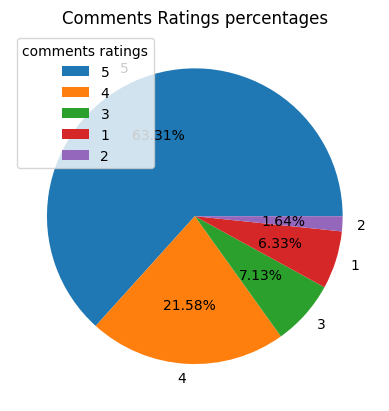

In [188]:
rating_percentages = data.ratings.value_counts().to_dict()
plt.pie(rating_percentages.values(), labels=rating_percentages.keys(), autopct='%1.2f%%')
plt.legend(rating_percentages.keys(), title='comments ratings')
plt.title('Comments Ratings percentages')


In [189]:
data.comments = data.comments.apply( lambda x : re.sub(' +', ' ', x).replace('\n','').replace('READ MORE','')) # replace multple spaces and \n

In [190]:
data.drop(columns=['raw_comments'], inplace=True)

In [192]:
data.to_csv('ratings_comments.csv', index=False, index_label=False)
data = pd.read_csv('ratings_comments.csv')


In [200]:
data.sample(n=10)

,ratings,comments
10684,5,thought that the product was a standard one bu...
10385,4,OK but moving pin not properly work
7384,1,Cell is dim it doesn't work properly 😔
2599,4,Nice watches
2031,2,it's a good product & superb looks
9673,5,This watch ⌚ very nice and looked. I like this...
11373,5,Good.
6037,5,Nice watch
8806,5,"Superb watch, must buy"
12763,4,Best product for kids


In [196]:
data.sample(n=10)

,ratings,comments
10736,5,Awesome product
1097,5,Fell like a expencive 🥰😊
10634,5,It's a gift for my Dad. He liked it. So stylis...
10106,5,"Classic, stylish stainless steel watch. Genuin..."
10137,2,It's date section is not working
9881,5,So great 💖💖💖💖😍😍😍😍💖💖💖💖. Thanku Limestone & than...
1869,5,Classy watch at this price by Titan... the be...
5788,4,Good at this price range. Update after 1 year...
10049,4,Fabulous watch
194,4,Good


2024-03-13 14:49:25,332 | INFO | category.py:223 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-03-13 14:49:25,357 | INFO | category.py:223 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='ratings', ylabel='count'>

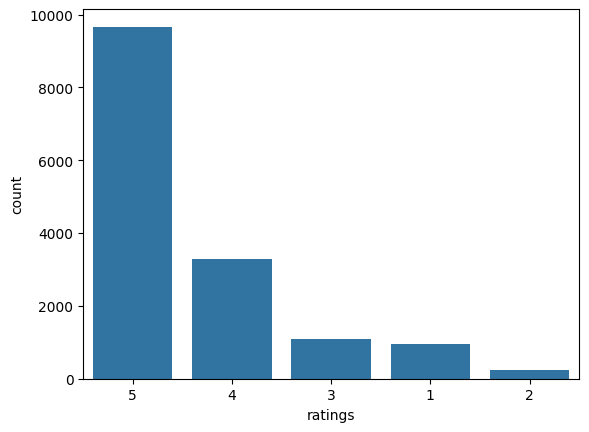

In [203]:
import seaborn as sns 

sns.countplot(data=data, 
              x='ratings', 
              order=data.ratings.value_counts().index)